<a href="https://colab.research.google.com/github/sameersat96/ML_ALgo_Classification/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VIdeo Lesson

## Importing

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df = pd.read_csv('/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [31]:
df.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [32]:
df.shape

(16, 4)

In [33]:
print(df['company'].nunique())
company_list = list(df['company'].unique())
company_list

3


['google', 'abc pharma', 'facebook']

In [34]:
print(df['job'].nunique())
job_list = list(df['job'].unique())
job_list

3


['sales executive', 'business manager', 'computer programmer']

In [35]:
print(df['degree'].nunique())
degree_list = list(df['degree'].unique())
degree_list

2


['bachelors', 'masters']

## Encoding

In [36]:
input = df.drop('salary_more_then_100k', axis=1)
input.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [37]:
target = df['salary_more_then_100k']
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [39]:
input['company_n'] = le.fit_transform(input['company'])
input.head()

,company,job,degree,company_n
0,google,sales executive,bachelors,2
1,google,sales executive,masters,2
2,google,business manager,bachelors,2
3,google,business manager,masters,2
4,google,computer programmer,bachelors,2


In [40]:
input['job_n'] = le.fit_transform(input['job'])
input.head()

,company,job,degree,company_n,job_n
0,google,sales executive,bachelors,2,2
1,google,sales executive,masters,2,2
2,google,business manager,bachelors,2,0
3,google,business manager,masters,2,0
4,google,computer programmer,bachelors,2,1


In [41]:
input['degree_n'] = le.fit_transform(input['degree'])
input

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [42]:
input1 = input.drop(['company','job','degree'], axis=1)
input1.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
model = DecisionTreeClassifier()

In [45]:
model.fit(input1, target)

DecisionTreeClassifier()

In [46]:
model.score(input1, target)*100

100.0

## Predict

In [47]:
input1.head(2)

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1


In [48]:
degree_list, job_list, company_list

(['bachelors', 'masters'],
 ['sales executive', 'business manager', 'computer programmer'],
 ['google', 'abc pharma', 'facebook'])

In [49]:
# Google, ComputerEng, Bachelors

c = 'abc pharma'
j = 'computer programmer'
d = 'masters'

#c = input()
#j = input(str())
#d = input(str())

if c == 'google':
  c1 = 2
elif c == 'abc pharma':
  c1 = 0
else:
  c1 = 1

if j == 'sales executive':
  j1 = 2
elif j == 'computer programmer':
  j1 = 1
else:
  j1 = 0

if d == 'bachelors':
  d1 = 0
else:
  d1 = 1

model.predict([[d1, j1, c1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

# Exercise

Titanic survivors

## Import

In [50]:
df = pd.read_csv('/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cleaning

In [51]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We need to remove some of the columns
1. PassengerId 
2. Pclass
3. Name
4. SibSp
5. PArch
6. Ticket
7. Fare
8. Cabin
9. Embarked

In [53]:
df1 = df.drop(['PassengerId','Name','SibSp','Parch','Ticket', 'Cabin','Embarked'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Checking for any null values

In [54]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [55]:
df1['Age'].mean()

29.69911764705882

In [56]:
df['Age'].median()

28.0

In [57]:
df2 = df1

In [58]:
df2['Age'] = df1['Age'].fillna(df1['Age'].mean())
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

## EDA

In [59]:
df2.head(2)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833


In [60]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

Text(0.5, 1.0, 'Age VS Survivaal')

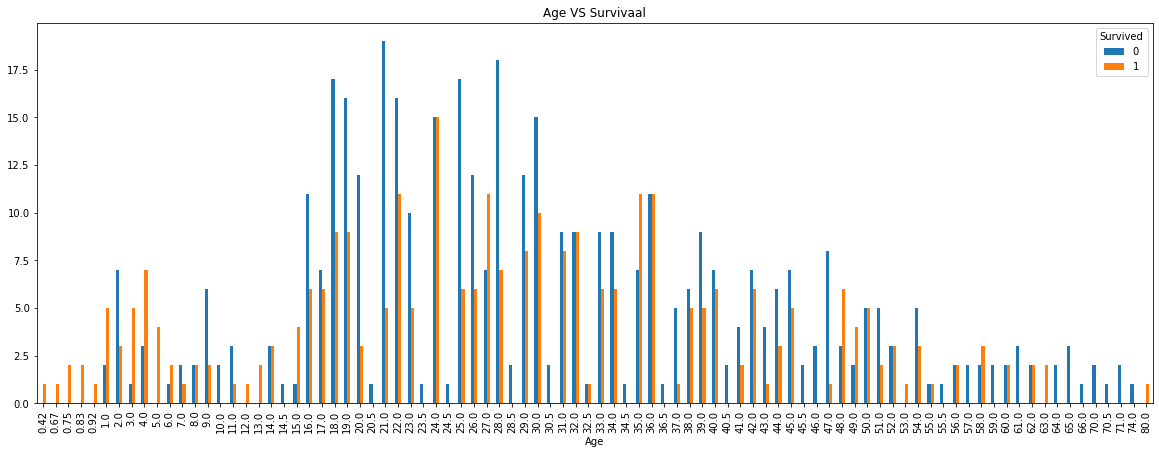

In [61]:
pd.crosstab(df['Age'], df['Survived']).plot(kind = 'bar', figsize=(20,7))
plt.title("Age VS Survivaal")

Text(0.5, 1.0, 'Age VS Pclass')

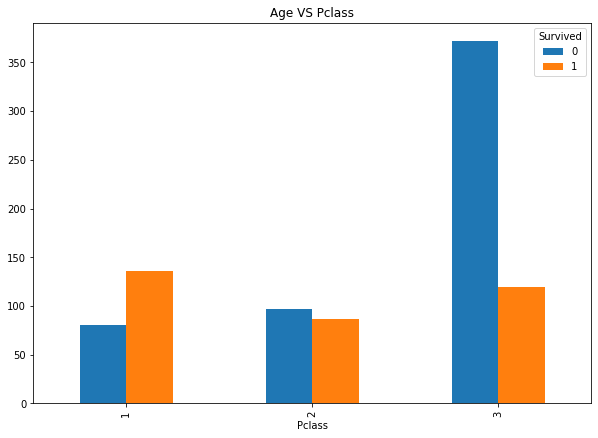

In [62]:
pd.crosstab(df['Pclass'], df['Survived']).plot(kind = 'bar', figsize=(10,7))
plt.title("Age VS Pclass")

Its clear that survival is playing and important role based in the class. People with Pclass 3 have survived more 

In [63]:
df['Fare'].nunique()

248

Text(0.5, 1.0, 'Fare VS Survivaal')

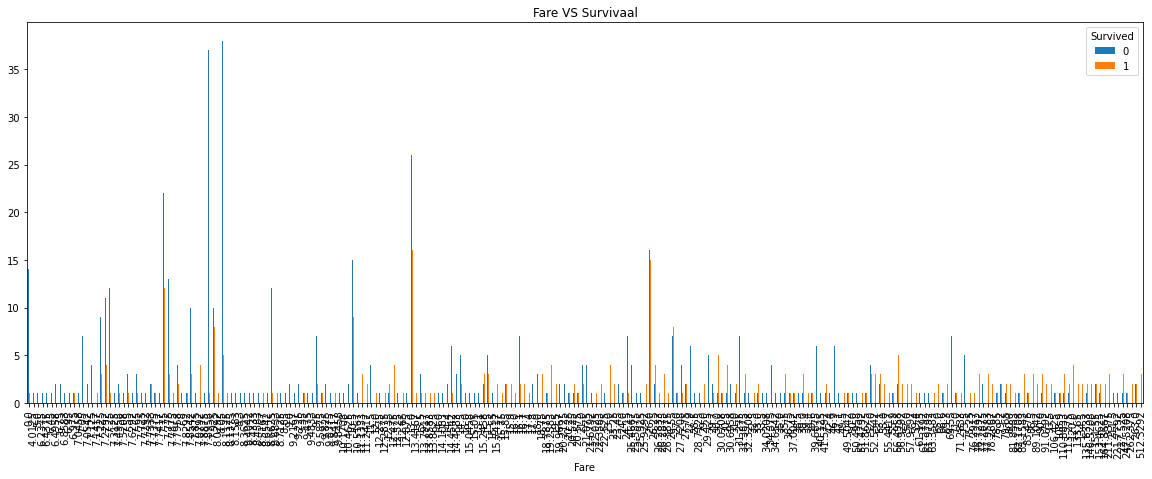

In [64]:
pd.crosstab(df['Fare'], df['Survived']).plot(kind = 'bar', figsize=(20,7))
plt.title("Fare VS Survivaal")

It can be seen that there are lesser survivals with people having low fair


## Encoding

Age has string which needs to be converted

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
df2['Sex'] = le.fit_transform(df2['Sex'])
df2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


### EDA with Sex

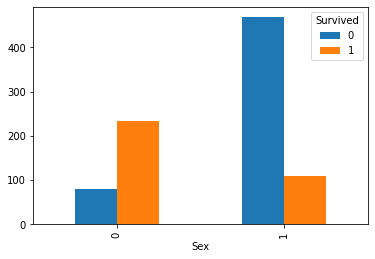

In [67]:
pd.crosstab(df2['Sex'], df2['Survived']).plot(kind ='bar')

* Females have better survival ratio
* Very few men have survived

## Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [70]:
X = df2.drop('Survived', axis=1)
y = df2['Survived']

X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [71]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [74]:
model = dt.fit(X_train, y_train)

In [75]:
model.score(X_train, y_train)

0.9845505617977528

In [76]:
model.score(X_test, y_test)

0.770949720670391

## Prediction

In [77]:
X.head(2)

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833


In [78]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [79]:
model.predict([[3,1,22,7.25]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [80]:
model.predict([[1,0,38,71.25]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])